In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb
from scipy import stats
from scipy.stats import ttest_ind

# Analyze Data

My next step will be to analyze the data in order to answer evaluation questions. 

In [22]:
GooglePlay = pd.read_csv("C:/Users/brend/Documents/GitHub/Play-Store-Exploratory-Analysis/Datasets/CleanData.csv")
GooglePlay = GooglePlay.iloc[:,1:]

In [23]:
GooglePlay.head()

,category,reviews,installs,price,content_rating,update_year,ratingR
0,ART_AND_DESIGN,159,10000,0.0,Everyone,2018,4.1
1,ART_AND_DESIGN,967,500000,0.0,Everyone,2018,3.9
2,ART_AND_DESIGN,87510,5000000,0.0,Everyone,2018,4.7
3,ART_AND_DESIGN,215644,50000000,0.0,Teen,2018,4.5
4,ART_AND_DESIGN,967,100000,0.0,Everyone,2018,4.3


1. Does the rating of an app correlate with any other variables? (e.g., reviews, installs, price)

I began to wonder, does an app's rating correlate with other variables? I wanted to create a correlation matrix that helped me see if any variables are correlated with each other.

In [51]:
#Creates a correlation matrix to determine if any relationship exists between columns.

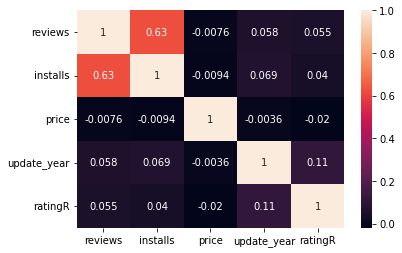

In [24]:
corr_matrix = sb.heatmap(GooglePlay.corr(), annot=True) 

In [25]:
# Change the colors of the matrix!

In [26]:
GooglePlay.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Blues'), axis=1)

,reviews,installs,price,update_year,ratingR
reviews,1.0,0.63,-0.0076,0.058,0.055
installs,0.63,1.0,-0.0094,0.069,0.04
price,-0.0076,-0.0094,1.0,-0.0036,-0.02
update_year,0.058,0.069,-0.0036,1.0,0.11
ratingR,0.055,0.04,-0.02,0.11,1.0


This matrix shows a slight correlation between reviews and installs.

In [27]:
GooglePlay['reviews'].corr(GooglePlay['installs']) # Calculates correlation % between installs and reviews.

0.6251638834019958

This matrix shows about 63% correlation between installs and reviews. Because people tend to review only apps they have installed, this makes sense. No other correlation seems significant to explore.

2. Is there a difference in rating between free and paid apps?

In my dive into the dataset, I wanted to see if the difference in rating between free and paid applications was significant. To answer this question, I needed to run an independent t-test. First, I recoded the price column into two groups, Free apps and those with a price tag. 

In [52]:
# Recode free and paid apps.

In [28]:
def recode_prices(series):
    if series <= 0.00 :
        return 'Free'
    else:
        return 'Paid' 

In [53]:
# adds new column with recoded data.

In [29]:
GooglePlay['priceR'] = GooglePlay['price'].apply(recode_prices) 
GooglePlay.head()

,category,reviews,installs,price,content_rating,update_year,ratingR,priceR
0,ART_AND_DESIGN,159,10000,0.0,Everyone,2018,4.1,Free
1,ART_AND_DESIGN,967,500000,0.0,Everyone,2018,3.9,Free
2,ART_AND_DESIGN,87510,5000000,0.0,Everyone,2018,4.7,Free
3,ART_AND_DESIGN,215644,50000000,0.0,Teen,2018,4.5,Free
4,ART_AND_DESIGN,967,100000,0.0,Everyone,2018,4.3,Free


In [30]:
GooglePlay.priceR.value_counts()

Free    8902
Paid     756
Name: priceR, dtype: int64

There are 8902 apps available to download for free, and 756 will have some type of cost.

# Testing Assumptions

Next, I had to test assumptions.

I will use an independent t-test to determine whether free and paid apps are significantly different. First, I will have to test for normality.

<AxesSubplot:>

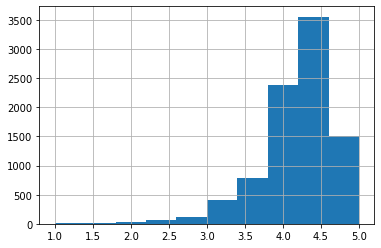

In [31]:
GooglePlay.ratingR[GooglePlay.priceR == 'Free'].hist()

<AxesSubplot:>

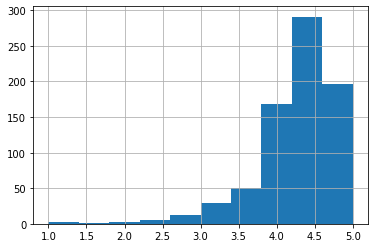

In [32]:
GooglePlay.ratingR[GooglePlay.priceR == 'Paid'].hist()

In order to test for normality in my data, I plotted my data and noticed it was negatively skewed. I will continue with this data.

In [55]:
 # runs independent ttest.

In [33]:
ttest_ind(GooglePlay.ratingR[GooglePlay.priceR == 'Free'], GooglePlay.ratingR[GooglePlay.priceR == 'Paid'])

Ttest_indResult(statistic=-4.317008786866272, pvalue=1.597357090633148e-05)

Test shows a significant difference between free and paid apps. I will now transform skewed data and run analysis again.

In [56]:
# Transforms skewed data into a new column

In [34]:
GooglePlay['ratingSQ'] = GooglePlay['ratingR']**2 

<AxesSubplot:>

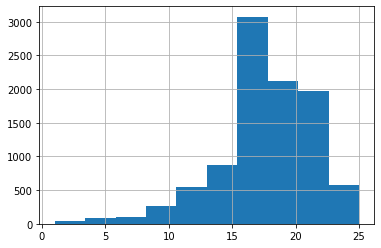

In [35]:
GooglePlay.ratingSQ.hist()

Data is not normal, will continue transforming data.

In [36]:
GooglePlay['ratingCUBE'] = GooglePlay['ratingR']**3

<AxesSubplot:>

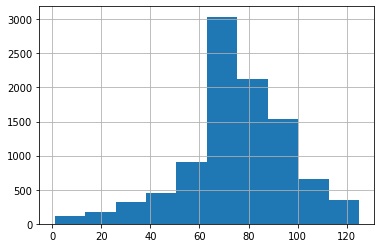

In [37]:
GooglePlay.ratingCUBE.hist()

Data looks more normal. Will use 'ratingCUBE' for analysis.

<AxesSubplot:>

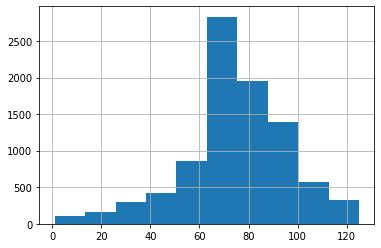

In [38]:
GooglePlay.ratingCUBE[GooglePlay.priceR == 'Free'].hist()

<AxesSubplot:>

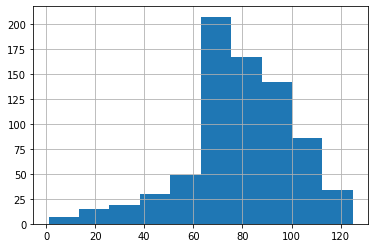

In [39]:
GooglePlay.ratingCUBE[GooglePlay.priceR == 'Paid'].hist()

# Run Analysis

Now, I will run the independent t-test on transformed data.

In [40]:
ttest_ind(GooglePlay.ratingCUBE[GooglePlay.priceR == 'Free'], GooglePlay.ratingCUBE[GooglePlay.priceR == 'Paid'])

Ttest_indResult(statistic=-5.315062192264318, pvalue=1.0899937302281937e-07)

 Voila! Test showed a significant difference with a p-value of 1.09 E-7. 

Now, I wanted to see which group had the highest ratings, so I calculated the average rating for each group.

In [57]:
 # shows the mean rating between free apps.

In [41]:
GooglePlay.ratingR[GooglePlay.priceR == 'Free'].mean()

4.165890573015529

In [58]:
 # shows the mean rating between paid apps.

In [42]:
GooglePlay.ratingR[GooglePlay.priceR == 'Paid'].mean()

4.246869691456635

The average rating for the free applications was 4.17, while the average rating for the paid applications was 4.25. Paid apps have a slightly higher average rating than free apps. but hmmm... Doesnt seem like there was much of a difference. Despite a significant difference in the test, further examination shows that the difference is not noteworthy.Although the tests show a significant difference, further exploration reveals that the average ratings between free and paid applications aren't very different. Paid apps have a slighter higher average rating than free apps. 

Even though I did not find a significant difference, I was determined to learn something about this dataset.

In [43]:
GP = GooglePlay.drop(['ratingSQ','ratingCUBE'], axis=1)

In [44]:
GPfree = GP[GP.priceR.isin(['Free',])] # Creates new dataframe with only free apps.
GPpaid = GP[GP.priceR.isin(['Paid',])] # Creates new dataframe with only paid apps.

In [45]:
GPfree.head()

,category,reviews,installs,price,content_rating,update_year,ratingR,priceR
0,ART_AND_DESIGN,159,10000,0.0,Everyone,2018,4.1,Free
1,ART_AND_DESIGN,967,500000,0.0,Everyone,2018,3.9,Free
2,ART_AND_DESIGN,87510,5000000,0.0,Everyone,2018,4.7,Free
3,ART_AND_DESIGN,215644,50000000,0.0,Teen,2018,4.5,Free
4,ART_AND_DESIGN,967,100000,0.0,Everyone,2018,4.3,Free


In [46]:
GPpaid.head()

,category,reviews,installs,price,content_rating,update_year,ratingR,priceR
233,BUSINESS,11442,100000,4.99,Everyone,2018,4.7,Paid
234,BUSINESS,10295,100000,4.99,Everyone,2017,4.8,Paid
372,COMMUNICATION,18247,100000,3.99,Everyone,2018,4.0,Paid
406,DATING,1545,10000,3.99,Mature 17+,2018,4.2,Paid
407,DATING,57,1000,6.99,Everyone,2017,2.6,Paid


In [59]:
 # Shows the categories with the highest average ratings between free apps.

In [47]:
GPfree.groupby('category')['ratingR'].mean().sort_values(ascending=False)

category
EVENTS                 4.435556
EDUCATION              4.350995
BOOKS_AND_REFERENCE    4.347856
ART_AND_DESIGN         4.338887
PARENTING              4.332759
PERSONALIZATION        4.306771
BEAUTY                 4.278571
SOCIAL                 4.251929
HEALTH_AND_FITNESS     4.237074
GAME                   4.236536
WEATHER                4.230399
SHOPPING               4.227300
SPORTS                 4.213348
AUTO_AND_VEHICLES      4.185416
PRODUCTIVITY           4.182236
COMICS                 4.181481
LIBRARIES_AND_DEMO     4.178125
FAMILY                 4.169936
FOOD_AND_DRINK         4.169110
PHOTOGRAPHY            4.165663
MEDICAL                4.152746
HOUSE_AND_HOME         4.150000
FINANCE                4.126850
ENTERTAINMENT          4.126000
COMMUNICATION          4.125903
NEWS_AND_MAGAZINES     4.116184
BUSINESS               4.098936
LIFESTYLE              4.085299
TRAVEL_AND_LOCAL       4.068341
MAPS_AND_NAVIGATION    4.043442
VIDEO_PLAYERS          4.043201

In [60]:
# Shows the categories with the highest average ratings between paid apps.

In [48]:
GPpaid.groupby('category')['ratingR'].mean().sort_values(ascending=False) 

category
NEWS_AND_MAGAZINES     4.800000
EDUCATION              4.750000
ART_AND_DESIGN         4.733333
ENTERTAINMENT          4.600000
SHOPPING               4.500000
EVENTS                 4.435556
PERSONALIZATION        4.424882
GAME                   4.363222
WEATHER                4.355382
HEALTH_AND_FITNESS     4.351475
FOOD_AND_DRINK         4.350000
AUTO_AND_VEHICLES      4.326941
BOOKS_AND_REFERENCE    4.324979
FAMILY                 4.267269
SPORTS                 4.251346
LIFESTYLE              4.241756
MEDICAL                4.218446
PRODUCTIVITY           4.197639
LIBRARIES_AND_DEMO     4.178125
TOOLS                  4.144786
VIDEO_PLAYERS          4.100000
TRAVEL_AND_LOCAL       4.089840
BUSINESS               4.082953
COMMUNICATION          4.074349
PHOTOGRAPHY            4.043666
FINANCE                3.897780
SOCIAL                 3.882430
MAPS_AND_NAVIGATION    3.860000
DATING                 3.701741
PARENTING              3.350000
Name: ratingR, dtype: float64

'Events' is the highest rating category for free apps, but 'News_And_Magazines' take the number one rated category within paid apps. The difference in rating between the top and last category is more significant with paid applications. The rating is notable when comparing each category individually.I discovered that the top rated categories differed for each group. Under free applications, 'books and reference' was rated third while the first two categories remained unchanged. On the other hand, under the paid applications, 'news and magazines' topped the list, while the second and third places remained the same. The difference in rating for the top three categories is also notable. Is this why the independent t test showed a significant difference?

3. What are other differences between free and paid apps?

In comparing the two groups, I realized that the categories with the most installs differed between free and paid applications.

In [61]:
# Shows the categories with the total installs for free apps.

In [49]:
GPfree.groupby('category')['installs'].sum().sort_values(ascending=False) 

category
GAME                   13857924450
COMMUNICATION          11036916201
TOOLS                   8000044474
PRODUCTIVITY            5791679314
SOCIAL                  5487861902
PHOTOGRAPHY             4647268915
FAMILY                  4407291691
VIDEO_PLAYERS           3926831720
TRAVEL_AND_LOCAL        2894704086
NEWS_AND_MAGAZINES      2369212260
ENTERTAINMENT           2113460000
BOOKS_AND_REFERENCE     1665946260
PERSONALIZATION         1529235988
SHOPPING                1400338685
HEALTH_AND_FITNESS      1143548402
SPORTS                  1095230683
BUSINESS                 696952090
MAPS_AND_NAVIGATION      503160790
LIFESTYLE                502644429
FINANCE                  455163132
WEATHER                  360288520
EDUCATION                352350000
FOOD_AND_DRINK           211738751
DATING                   140914757
ART_AND_DESIGN           114322100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53080061
LIBRARIES_AND_DEMO        52995810
COMICS     

In [62]:
# Shows the categories with the total installs between paid.

In [50]:
GPpaid.groupby('category')['installs'].sum().sort_values(ascending=False) 

category
GAME                   20999965
FAMILY                 20649814
PERSONALIZATION         3258794
PHOTOGRAPHY             1878740
TOOLS                   1727441
PRODUCTIVITY            1412055
COMMUNICATION           1360050
SPORTS                  1243815
LIFESTYLE               1179110
WEATHER                  812000
EDUCATION                602000
MEDICAL                  560833
HEALTH_AND_FITNESS       474110
BUSINESS                 212775
ENTERTAINMENT            200000
FINANCE                  185602
TRAVEL_AND_LOCAL         183060
MAPS_AND_NAVIGATION      121100
VIDEO_PLAYERS             71000
FOOD_AND_DRINK            60000
AUTO_AND_VEHICLES         50150
PARENTING                 50100
BOOKS_AND_REFERENCE       23316
ART_AND_DESIGN            16000
DATING                    11350
SHOPPING                  10100
SOCIAL                     6000
NEWS_AND_MAGAZINES         5500
LIBRARIES_AND_DEMO          100
EVENTS                        1
Name: installs, dtype: int64

While 'Games' remained the top category for both groups, 'Family' and 'Personalization' took the second and third spots in paid applications. However it remained the same for free applications. Upon deeper exploration, I also found that many Family apps are also games. There is no doubt that applications have become a source of entertainment for many of us!The top categories with the most installs between paid apps are 'Games','Family', and taking the third spot is 'Personalization'.

# Summary

Overall, I learned a lot from this dataset.

1. Installs and reviews are strongly correlated.

2. 'Games' are the most installed category of all applications.

3. When comparing each category individually, the difference between free and paid apps is notable even though the average rating does not show much of a difference.

4. Top rated categories differ between free and paid applications.